In [311]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
plt.style.use('classic')
rc('font', **{'family': 'DejaVu Sans', 'serif': ['Computer Modern'], 'size':15})
rc('text', usetex=True)
rc('figure', facecolor='w')
import astropy.io.fits as fits
import math, os

In [446]:
def mean(array):
    return np.sum(array)/len(array)

def stdev(array):
#     return np.sqrt(np.abs(mean(array)**2 - mean(array**2)))
    return np.sqrt(sum((array - mean(array))**2)/(len(array) - 1))

def median(array):
    percentile50 = int(np.round(len(array)/2))
   
    return sorted(array)[percentile50]
    
def cutData(array, **kwargs):
    
    avg = mean(array)
    std = stdev(array)
    arr_rng = [min(array), max(array)]
    
    if 'sigma' in kwargs:
        sigma = kwargs.get('sigma')
        low = int(np.round((avg-sigma*std)))
        high = int(np.round((avg+sigma*std)))
        cut = kwargs.get('cut', [low, high])
    elif 'rng' in kwargs:
        cut = kwargs.get('rng')
    else:
        cut = kwargs.get('cut', arr_rng)
    pixel_keep = np.where((array > cut[0]) & (array < cut[1]))[0]
    
    cut_array = array[pixel_keep]
    per_rem = np.round((1 - len(cut_array)/len(array))*100,2)
    print('Cut from range %s to %s, removing %s percent of data points'%(arr_rng, cut, per_rem))
    
    return cut_array

In [318]:
def factorial(n):
#     nfact = 1
#     for i in range(n):
#         nfact *= (i+1)
    nfact = math.sqrt(2*math.pi) * n**(n+.5) / math.e**n
        
    return nfact

# def poisson(avg, std):


710.078184642185

In [449]:
def readData(folder):
    """
    Read all frames from a given directory into one matrix.
    input:  directory to folder containing frames
    output: array3d (dimension: xpixel x ypixel x # frames)
            array2D (dimension: 1D flattened img x # frames)
    """
    
    files = os.listdir(folder)

    array3D, array2D = [], []
    for ff in files:
        arr = fits.getdata(folder + ff)
        array3D.append(arr)
        array2D.append(arr.flatten())
    
    return np.array(array3D), np.array(array2D)

def combineFrame(data_array):
    """
    Combine image frames and return 1D array.
    input:  data array (dimension: # 1D detector counts x # frames)
    output: 1D combined array of detector counts (ADU)
    """
    
    comb = []
    
    return comb

def plotImg(arr, **kwargs):
    avg = mean(arr.flatten())
    std = stdev(arr.flatten())
    
    sigma = kwargs.get('sigma', 5)
    rng = kwargs.get('rng', [avg-sigma*std, avg+sigma*std])
    
    pl = plt.imshow(arr, origin='lower', interpolation='nearest', cmap='viridis', vmin=rng[0], vmax=rng[1])
    if 'sigma' in kwargs: 
        plt.colorbar(pl).set_label('Detector Value %s-$\sigma$ scale (ADU)'%(sigma))
    else:
        plt.colorbar(pl).set_label('Detector Value (ADU)')
    plt.xlabel('pixels(x)')
    plt.ylabel('pixels(y)')
    plt.show()

def plotHist(arr, **kwargs):
    avg = mean(arr)
    std = stdev(arr)
    med = median(arr)
    
    sigma = kwargs.get('sigma', 5)
    low = int(np.round((avg-sigma*std)))
    high = int(np.round((avg+sigma*std)))
    rng = kwargs.get('rng', [low, high])
    exp = kwargs.get('exp')
    
    hr = np.arange(rng[0], rng[1])
    hist = []
    for i in hr:
        counts = len(np.where(arr==i)[0])
        hist.append(counts)
    plt.step(hr, hist, color='k')

    plt.axvline(avg, color='b', label=r'$\bar{x}=%s$'%(np.round(avg,2)))
    plt.axvline(med, color='b', label=r'$\tilde{x}=%s$'%(np.round(med,2)), linestyle='dashed')
    for i in np.arange(1,sigma+1):
        if i == 1:
            plt.axvspan(avg-i*std, avg+i*std, facecolor='g', alpha=0.05, label=r'$\sigma=\pm %s$'%(np.round(std,2)))
        else:
            plt.axvspan(avg-i*std, avg+i*std, facecolor='g', alpha=0.05)
    
    plt.legend(loc='upper left')
    plt.xlabel('Counts (ADU)')
    plt.ylabel('Frequency')
    if 'exp' in kwargs:
        plt.title('Exposure Time: %s sec'%(exp))
    plt.xlim(rng)
    plt.show()
    
def computeStat(arr, **kwargs):
    
    return 0

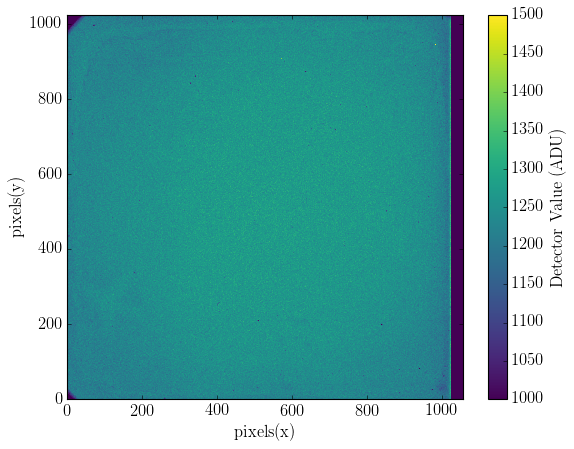

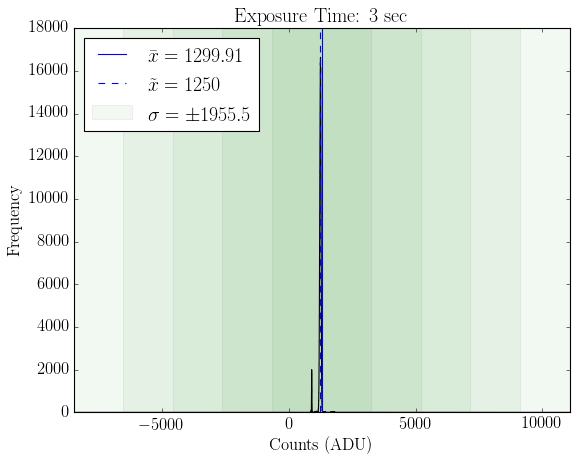

In [451]:
exp = 3
sigma = 5
rng = [1000,1500]

array3D, array2D = readData('data/exp%s/'%(exp))
arr3D = array3D[0]

plotImg(arr3D, rng=rng)
array = arr3D.flatten()
plotHist(array, sigma=sigma, exp=exp)

Cut from range [868, 65535] to [1000, 1500], removing 3.49 percent of data points


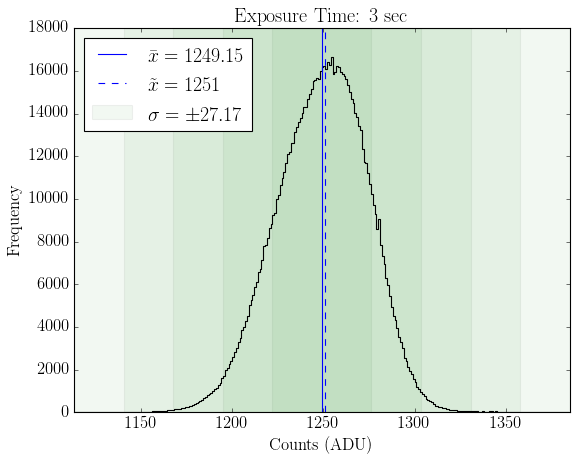

In [452]:
array = cutData(arr3D.flatten(), rng=rng)
plotHist(array, sigma=sigma, exp=exp)

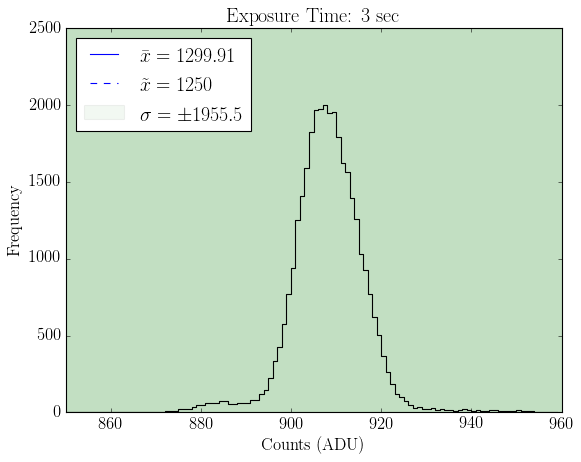

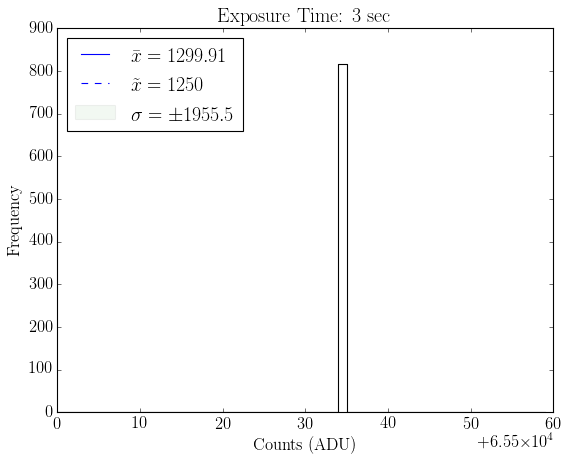

In [463]:
r1 = [850,960]
r2 = [65500,65560]
plotHist(arr3D.flatten(), rng=r1, exp=exp)
plotHist(arr3D.flatten(), rng=r2, exp=exp)

In [453]:
max(arr3D.flatten())

65535

In [247]:
xbar, var = [], []
for f in files:
    arr = fits.getdata('data/' + f)
    hdr = fits.open('data/' + f)
    data = hdr[0].data.flatten()
    
    xbar.append(mean(data))
    var.append(stdev(data))

FileNotFoundError: [Errno 2] No such file or directory: 'data/d406.fits'

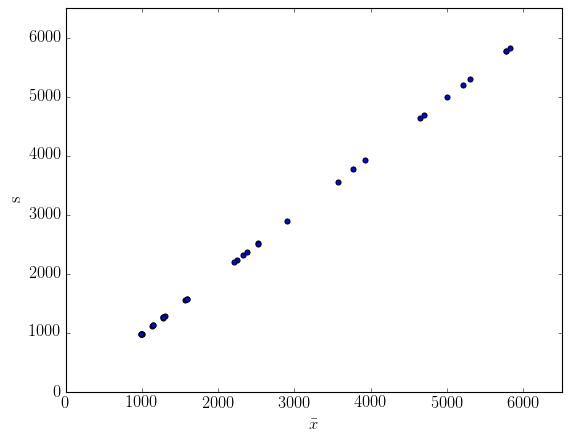

In [122]:
x = np.arange(min(xbar), max(xbar))

plt.scatter(xbar, var)
# plt.xscale('log')
# plt.yscale('log')
plt.xlim(0,6500)
plt.ylim(0,6500)
plt.xlabel(r'$\bar{x}$')
plt.ylabel(r's')
plt.show()